In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error

## 1. Data Exploration and Preprocessing

In [2]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
df.head()


# column_names = df.columns.tolist()
# print(len(column_names))

def print_column_values(col):
    my_set = set()
    for value in df[col]:
        my_set.add(value)
    print(my_set)

The dataset has the following features:

* encounter_id: (Number)
آیدی منحصر به فرد برای دیدار با هر بیمار

* patient_nbr: (Number)
آیدی منحصر به فرد هر بیمار

* race: (Categorical)
نژاد فرد
[Caucasian, African American, Hispanic, Asian, Other]

* gender: (Categorical)
جنسیت فرد
[Female, Male, Unknown/Invalid]

* age: [x, y)
سن فرد در بازه های 10 ساله

* weight: [x, y)
وزن بیمار در بازه های 10 تایی

* admission_type_id: (Categorical)
نوع پذیرش که اطلاعات کامل در فایل اکسل است

* discharge_disposition_id: (Categorical)
نوع ترخیص که اطلاعات کامل در فایل اکسل است

* admission_source_id: (Categorical)
نوع منبع پذیرش که اطلاعات کامل در فایل اکسل است

* time_in_hospital: (Number)
مدت زمان بستری در بیمارستان به روز

* payer_code: (Categorical)
نوع بیمه سلامت فرد که اطلاعات کامل در فایل اکسل اضافه کردیم

* medical_specialty: (Categorical)
نوع متخصص که اطلاعات کامل در فایل اکسل اضافه کردیم

* num_lab_procedures: (Number)
تعداد تست های آزمایشگاهی گرفته شده

* num_procedures: (Number)
تعداد عمل های انجام شده

* num_medications: (Number)
تعداد دارو های مصرف شده

* number_outpatient: (Number)
تعداد ویزیت های کوتاه

* number_emergency: (Number)
تعداد ویزیت های اورژانسی

* number_inpatient: (Number)
تعداد بستری های بیمار

* diag_1: (ICD-9)
معاینه اصلی

* diag_2: (ICD-9)
معاینه دوم

* diag_3: (ICD-9)
معاینه سوم

* number_diagnoses: (Number)
تعداد معاینه ها

* max_glu_serum: (Categorical)
بازه ای از نتایج تست یا دو حالت دیگر که تست انجام شده است یا خیر برای Glucose serum test
['>200', '>300', 'Norm', 'None']

* A1Cresult: (Categorical)
بازه ای از نتایج تست یا دو حالت دیگر که تست انجام شده است یا خیر برای A1C
['>7', '>8', 'Norm', 'None']


موارد زیر می گوید که آیا دارو تجویز شده است یا خیر
(Categorical)
['Down', 'Up', 'Steady', 'No']
* metformin
* repaglinide
* nateglinide
* chlorpropamide
* glimepiride
* acetohexamide
* glipizide
* tolbutamide
* pioglitazone
* rosiglitazone
* acarbose
* miglitol
* troglitazone
* tolazamide
* examide
* citoglipton
* insulin
* glyburide-metformin
* glipizide-metformin
* glimepiride-pioglitazone
* metformin-rosiglitazone
* metformin-pioglitazone


* change: (Categorical)
آیا دارو های دیابت تغییر کرده اند یا خیر
['Ch', 'No']

* diabetesMed: (Categorical)
آیا هر داروی ضد دیابتی تجویز شده است یا خیر
['Yes', 'No']

* readmitted: (Categorical)
آیا بیمار پس از 30 روز مجددا در بیمارستان پذیرفته شده است یا نه
['NO', '>30', '<30']

#### Handle missing data

In [3]:
m = df.shape[0]
for col in df.columns:
    count = df[col].astype(str).str.count('\?').sum()
    print(f"{col} : {count / m} %")

count = df["gender"].astype(str).str.count('Unknown/Invalid').sum()
print(f"gender : {count}")

encounter_id : 0.0 %
patient_nbr : 0.0 %
race : 0.022335554114340742 %
gender : 0.0 %
age : 0.0 %
weight : 0.9685847925633315 %
admission_type_id : 0.0 %
discharge_disposition_id : 0.0 %
admission_source_id : 0.0 %
time_in_hospital : 0.0 %
payer_code : 0.395574160328597 %
medical_specialty : 0.49082208203132677 %
num_lab_procedures : 0.0 %
num_procedures : 0.0 %
num_medications : 0.0 %
number_outpatient : 0.0 %
number_emergency : 0.0 %
number_inpatient : 0.0 %
diag_1 : 0.0002063557573256294 %
diag_2 : 0.0035178743391702533 %
diag_3 : 0.013983059174970029 %
number_diagnoses : 0.0 %
max_glu_serum : 0.0 %
A1Cresult : 0.0 %
metformin : 0.0 %
repaglinide : 0.0 %
nateglinide : 0.0 %
chlorpropamide : 0.0 %
glimepiride : 0.0 %
acetohexamide : 0.0 %
glipizide : 0.0 %
glyburide : 0.0 %
tolbutamide : 0.0 %
pioglitazone : 0.0 %
rosiglitazone : 0.0 %
acarbose : 0.0 %
miglitol : 0.0 %
troglitazone : 0.0 %
tolazamide : 0.0 %
examide : 0.0 %
citoglipton : 0.0 %
insulin : 0.0 %
glyburide-metformin : 0.

In [4]:

# discharge_disposition_id

# Categorical Values
races = ["AfricanAmerican", "Other", "Caucasian", "Asian", "Hispanic"]
genders = ["Male", "Female"]

# Race
df.loc[df["race"] == "?", "race"] = random.choice(races)
print_column_values("race")

# Gender
df.loc[df["gender"] == "Unknown/Invalid", "gender"] = random.choice(genders)
print_column_values("gender")


# Age
def extract_max(range_str):
    range_str = range_str.strip('[]()')
    range_values = range_str.split('-')
    return range_values[1]


df["age"] = df["age"].apply(extract_max)

# Time in hospital
# df["time_in_hospital"] = df["time_in_hospital"].apply(lambda x: "<8" if x < 8 else ">=8")

# Num lab procedures
# df["num_lab_procedures"] = df["num_lab_procedures"].apply(lambda x: "<45" if x < 45 else ">=45")

# Num procedures
# df["num_procedures"] = df["num_procedures"].apply(lambda x: "<2" if x < 2 else ">=2")

# Num medications
df["num_medications"] = df["num_medications"].apply(lambda x: "<15" if x < 15 else ">=15")


# Num outpatient
# df["number_outpatient"] = df["number_outpatient"].apply(lambda x: "<1" if x < 1 else ">=1")

# Num emergency
# df["number_emergency"] = df["number_emergency"].apply(lambda x: "<1" if x < 1 else ">=1")

# Num inpatient
# df["number_inpatient"] = df["number_inpatient"].apply(lambda x: "<1" if x < 1 else ">=1")

# diag 1-2-3
def icd9_diabetes(icd9):
    if icd9.startswith("250"):
        return "Diabetes"
    elif "V" in icd9 or "?" in icd9 or "E" in icd9:
        return "Other"
    elif 390<=float(icd9)<=459 or icd9 == "785":
        return "Circulatory"
    elif 460<=float(icd9)<=519 or icd9 == "786":
        return "Respiratory"
    elif 520<=float(icd9)<=579 or icd9 == "787":
        return "Digestive"
    elif 800<=float(icd9)<=999:
        return "Injury"
    elif 710<=float(icd9)<=739:
        return "Musculoskeletal"
    elif 580<=float(icd9)<=629 or icd9 == "788":
        return "Genitourinary"
    elif 140<=float(icd9)<=239:
        return "Neoplasms"
    else:
        return "Other"


df["diag_1"] = df["diag_1"].apply(icd9_diabetes)
df["diag_2"] = df["diag_2"].apply(icd9_diabetes)
df["diag_3"] = df["diag_3"].apply(icd9_diabetes)

# Number diagnoses
# df["number_diagnoses"] = df["number_diagnoses"].apply(lambda x: "<9" if x < 9 else ">=9")


df = df.drop(
    labels=["encounter_id", "patient_nbr", "race", "gender", "weight", "admission_type_id", "discharge_disposition_id",
            "admission_source_id", "payer_code", "medical_specialty", "examide", "citoglipton"], axis=1)
# ,  "age"

{'Other', 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'}
{'Male', 'Female'}


In [5]:
# df["readmitted"] = df["readmitted"].replace({">30": 1, "NO": 0, "<30": 1})
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])



In [6]:
# print_column_values("diag_3")

# u1 = 0
# u2 = 0
#
# for value in df["number_diagnoses"]:
#     if value <= 8:
#         u1 += 1
#     elif 8 < value <= 85:
#         u2 += 1
# print(u1, u2)

# Down = 0
# Up = 0
# Steady = 0
# No = 0
#
# for value in df["metformin"]:
#     if value == 'Down':
#         Down += 1
#     if value == 'Up':
#         Up += 1
#     if value == 'Steady':
#         Steady += 1
#     if value == 'No':
#         No += 1
#
# print(Down, Up, Steady, No)

'''
Group by readmitted
'''
# most of the repeated values are the same order:
# pd.set_option('display.max_rows', None)
for col in df:
    count = df.groupby('readmitted')[col].value_counts()
    print(count)
#

# df

readmitted  age
0           8       3069
            7       2502
            9       2078
            6       1668
            5       1027
            4        424
            1        310
            3        236
            2         40
            0          3
1           8       9475
            7       7897
            9       6223
            6       5917
            5       3278
            4       1187
            1        808
            3        510
            2        224
            0         26
2           8      13524
            7      12084
            6       9671
            9       8896
            5       5380
            4       2164
            1       1675
            3        911
            2        427
            0        132
Name: age, dtype: int64
readmitted  time_in_hospital
0           3                   1894
            2                   1712
            4                   1644
            5                   1199
            1                   1

In [7]:
# cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses', 'age', 'admission_type_id', 'admission_source_id','discharge_disposition_id', 'A1Cresult', 'insulin', 'gender', 'num_procedures', 'number_outpatient', 'number_inpatient', 'max_glu_serum', 'change', 'diabetesMed', 'readmitted']
# 'admission_source_id', 'medical_specialty',

cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses', 'age', 'A1Cresult', 'insulin', 'num_procedures', 'number_outpatient', 'number_inpatient', 'max_glu_serum', 'change', 'diabetesMed', 'diag_1', 'diag_2', 'diag_3', 'readmitted']
# cols = ['number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'readmitted']
df = df[cols]
df

,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,age,A1Cresult,insulin,num_procedures,number_outpatient,number_inpatient,max_glu_serum,change,diabetesMed,diag_1,diag_2,diag_3,readmitted
0,1,41,0,1,0,2,1,0,0,0,2,1,0,1,7,7,2
1,3,59,1,9,2,2,3,0,0,0,2,0,1,7,1,7,1
2,2,11,0,6,3,2,1,5,2,1,2,1,1,7,1,7,2
3,2,44,1,7,4,2,3,1,0,0,2,0,1,7,1,0,2
4,1,51,0,5,5,2,2,0,0,0,2,0,1,6,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,1,9,8,1,0,0,0,0,2,0,1,1,7,0,1
101762,5,33,1,9,9,2,2,3,0,1,2,1,1,2,7,2,2
101763,1,53,0,13,8,2,0,0,1,0,2,0,1,7,3,7,2
101764,10,45,1,9,9,2,3,2,0,1,2,0,1,4,7,4,2


## 2. Model Development

In [8]:
X = df.drop('readmitted', axis=1)
y = df.readmitted
#--------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth = 100
min_samples_leaf = 750
max_leaf_nodes = 25

dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, max_leaf_nodes=max_leaf_nodes)
dt.fit(X_train, y_train)
# Make predictions on the test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# Calculate the accuracy of the model
accuracy_test = accuracy_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_test)
print("Test Accuracy:", accuracy_train)

'''
>30 = 1
Train Accuracy: 0.65614
Test Accuracy: 0.65343

3:
Train Accuracy: 0.5700142485137326
Test Accuracy: 0.5692247224132848
'''

Train Accuracy: 0.5700142485137326
Test Accuracy: 0.5692247224132848


'\n>30 = 1\nTrain Accuracy: 0.65614\nTest Accuracy: 0.65343\n\n3:\nTrain Accuracy: 0.5700142485137326\nTest Accuracy: 0.5692247224132848\n'

In [13]:
n_estimators = 100
# random_state = 42 , random_state=random_state

rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy_test = accuracy_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", accuracy_test)
print("Test Accuracy:", accuracy_train)

'''
>30 = 1
Train Accuracy: 0.65360
Test Accuracy: 0.65088

3:
Train Accuracy: 0.5713654006780328
Test Accuracy: 0.5709934165274639
'''

Train Accuracy: 0.5717216135213482
Test Accuracy: 0.5717303724083718


'\n>30 = 1\nTrain Accuracy: 0.65360\nTest Accuracy: 0.65088\n\n3:\nTrain Accuracy: 0.5713654006780328\nTest Accuracy: 0.5709934165274639\n'

## 3. Model Evaluation and Interpretation

[9, 16]
['number_inpatient' 'readmitted']


<AxesSubplot:>

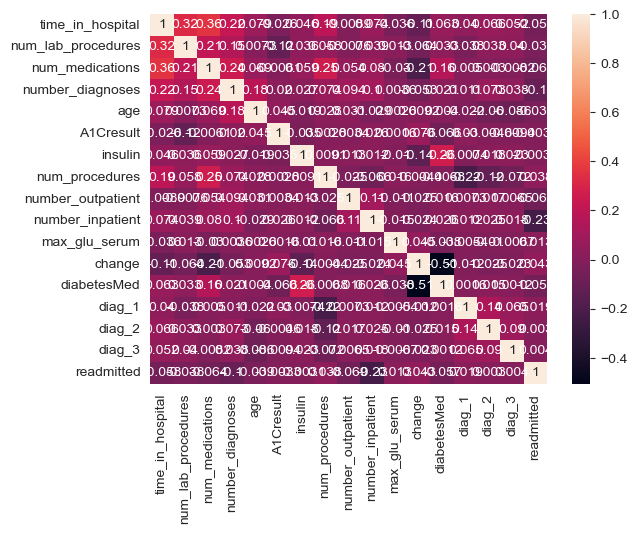

In [10]:
absolute_correlations = df.corr()['readmitted'].abs()
# print(absolute_correlations)

features_index = np.where(absolute_correlations > 0.2)
features_index = np.array(features_index).tolist()[0]
print(features_index)

features = df.columns.values[features_index]
print(features)

sns.heatmap(df.corr(), annot=True)

In [11]:
# from sklearn.metrics import mean_absolute_error
# from sklearn.tree import DecisionTreeRegressor
#
# def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
#     model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
#     model.fit(train_X, train_y)
#     preds_val = model.predict(val_X)
#     mae = mean_absolute_error(val_y, preds_val)
#     return(mae)

# # compare MAE with differing values of max_leaf_nodes
# for max_leaf_nodes in [5, 50, 500, 5000]:
#     my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
#     print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

# from sklearn.ensemble import RandomForestRegressor
# # Define the model. Set random_state to 1
# rf_model = RandomForestRegressor(random_state = 1)
# # fit your model
# rf_model.fit(train_X, train_y)
# # Calculate the mean absolute error of your Random Forest model on the validation data
# rf_val_mae = mean_absolute_error(val_y, rf_model.predict(val_X))
# print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))
# # Check your answer
# step_1.check()

## 4. Documentation and Presentation